<a href="https://colab.research.google.com/github/sadia-sigma-lab/Analysing-and-Predicting-Fish-Growth/blob/main/file_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect Drive to get data files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/upwork 24/Model Optimization

/content/drive/MyDrive/upwork 24/Model Optimization


## Reading and Processing Input Data from all ponds

In [ ]:
ls

'Copy of file.ipynb'   ponds_data/


In [ ]:
import pandas as pd
import os

# Define the folder path containing the CSV files
folder_path = 'ponds_data/'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store the dataframes
dataframes = []

# Loop over the CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all the DataFrames in the list into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Select the required columns
selected_columns = ['Temperature (C)', 'Turbidity(NTU)', 'PH', 'Fish_Weight(g)']
final_df = merged_df[selected_columns]

# Show the final DataFrame
print(final_df)


<ipython-input-64-b2100a041957>:16: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-64-b2100a041957>:16: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-64-b2100a041957>:16: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


         Temperature (C)  Turbidity(NTU)       PH  Fish_Weight(g)
0                24.8750           100.0  8.43365            2.91
1                24.9375           100.0  8.43818            2.91
2                24.8750           100.0  8.42457            2.91
3                24.9375           100.0  8.43365            2.91
4                24.9375           100.0  8.40641            2.91
...                  ...             ...      ...             ...
1114965              NaN           -10.0  4.19833             NaN
1114966              NaN           -10.0  4.07122             NaN
1114967              NaN           -10.0  4.18017             NaN
1114968              NaN           -10.0  4.18471             NaN
1114969              NaN           -10.0  4.18017             NaN

[1114970 rows x 4 columns]


In [ ]:
final_df.head()

,Temperature (C),Turbidity(NTU),PH,Fish_Weight(g)
0,24.8750,100.0,8.43365,2.91
1,24.9375,100.0,8.43818,2.91
2,24.8750,100.0,8.42457,2.91
3,24.9375,100.0,8.43365,2.91
4,24.9375,100.0,8.40641,2.91


## Data Cleaning

In [ ]:
final_df.dropna(inplace=True)

<ipython-input-66-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [ ]:
final_df

,Temperature (C),Turbidity(NTU),PH,Fish_Weight(g)
0,24.8750,100.0,8.43365,2.91
1,24.9375,100.0,8.43818,2.91
2,24.8750,100.0,8.42457,2.91
3,24.9375,100.0,8.43365,2.91
4,24.9375,100.0,8.40641,2.91
...,...,...,...,...
83121,26.5625,100.0,2.56412,318.64
83122,26.5625,100.0,2.67760,318.64
83123,26.5000,100.0,2.45063,318.64
83124,26.3750,100.0,2.41885,318.64


In [ ]:
# Step 2: Filter Outliers
# For simplicity, we'll remove rows where any value is an outlier in its column
# An outlier is defined as a value that is below the 1st quartile - 1.5 * IQR or above the 3rd quartile + 1.5 * IQR
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1
is_not_outlier = ~((final_df < (Q1 - 1.5 * IQR)) | (final_df > (Q3 + 1.5 * IQR))).any(axis=1)
final_df = final_df[is_not_outlier]



In [ ]:
# Show the cleaned and preprocessed DataFrame
print(final_df)

       Temperature (C)  Turbidity(NTU)       PH  Fish_Weight(g)
0              24.8750           100.0  8.43365            2.91
1              24.9375           100.0  8.43818            2.91
2              24.8750           100.0  8.42457            2.91
3              24.9375           100.0  8.43365            2.91
4              24.9375           100.0  8.40641            2.91
...                ...             ...      ...             ...
82374          23.7500           100.0  6.89477          145.30
82375          23.7500           100.0  6.89023          145.30
82376          23.8125           100.0  6.88569          145.30
82377          23.8125           100.0  6.89023          145.30
82378          23.7500           100.0  6.88569          145.30

[67397 rows x 4 columns]


## Data Filtering

In [ ]:
# Filter rows where pH is between 0 and 14
final_df = final_df[(final_df['PH'] >= 0) & (final_df['PH'] <= 14)]

# Filter rows where Turbidity is between 0 and 100
final_df = final_df[(final_df['Turbidity(NTU)'] >= 0) & (final_df['Turbidity(NTU)'] <= 100)]

# Filter rows where Temperature is positive
final_df = final_df[final_df['Temperature (C)'] > 0]

# Filter rows where Fish_Weight is positive
final_df = final_df[final_df['Fish_Weight(g)'] > 0]

# Show the cleaned DataFrame
print(final_df)

       Temperature (C)  Turbidity(NTU)       PH  Fish_Weight(g)
0              24.8750           100.0  8.43365            2.91
1              24.9375           100.0  8.43818            2.91
2              24.8750           100.0  8.42457            2.91
3              24.9375           100.0  8.43365            2.91
4              24.9375           100.0  8.40641            2.91
...                ...             ...      ...             ...
82374          23.7500           100.0  6.89477          145.30
82375          23.7500           100.0  6.89023          145.30
82376          23.8125           100.0  6.88569          145.30
82377          23.8125           100.0  6.89023          145.30
82378          23.7500           100.0  6.88569          145.30

[67397 rows x 4 columns]


## Exploratory Data Analysis

### Descriptive Statistics

In [ ]:
# Descriptive statistics for each column
descriptive_stats = final_df.describe()
print(descriptive_stats)

       Temperature (C)  Turbidity(NTU)            PH  Fish_Weight(g)
count     67397.000000    67397.000000  67397.000000    67397.000000
mean         24.505982       96.967076      7.561490       40.391614
std           0.636684        4.927051      0.445169       28.726732
min          23.000000       78.000000      6.858450        2.910000
25%          24.062500       93.000000      7.139900       13.250000
50%          24.500000      100.000000      7.466740       33.730000
75%          24.875000      100.000000      7.875290       68.400000
max          26.125000      100.000000      8.551670      145.300000


### Correlation Analysis

In [ ]:
# Correlation matrix to see the relationship between variables
correlation_matrix = final_df.corr()
print(correlation_matrix)


                 Temperature (C)  Turbidity(NTU)        PH  Fish_Weight(g)
Temperature (C)         1.000000        0.414069  0.554100       -0.557089
Turbidity(NTU)          0.414069        1.000000  0.564379       -0.598307
PH                      0.554100        0.564379  1.000000       -0.923969
Fish_Weight(g)         -0.557089       -0.598307 -0.923969        1.000000


### Visualizations

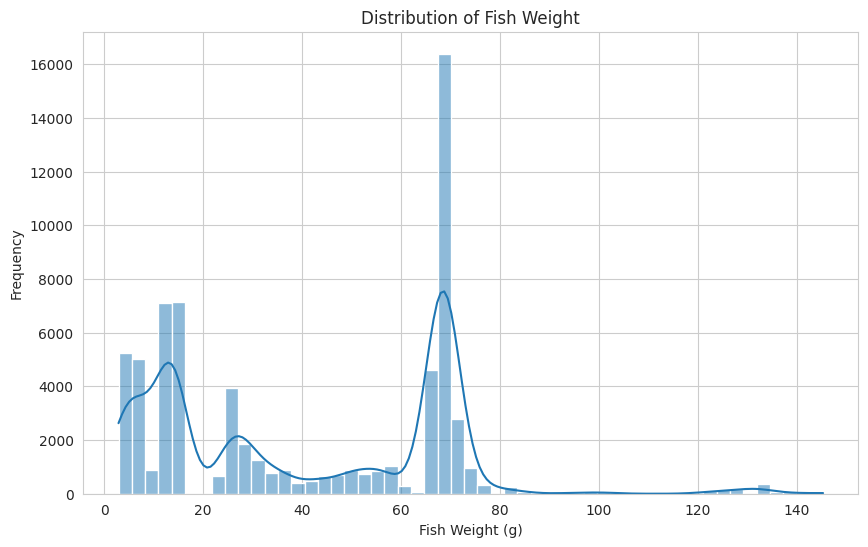

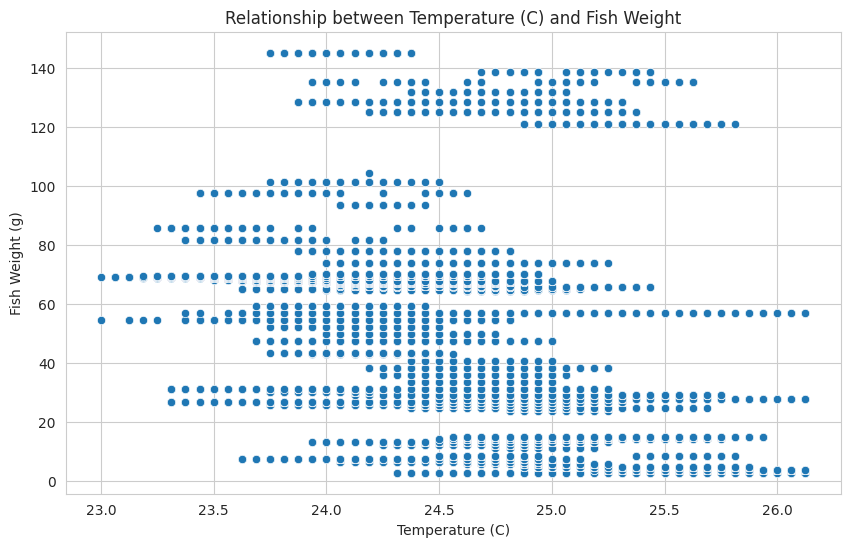

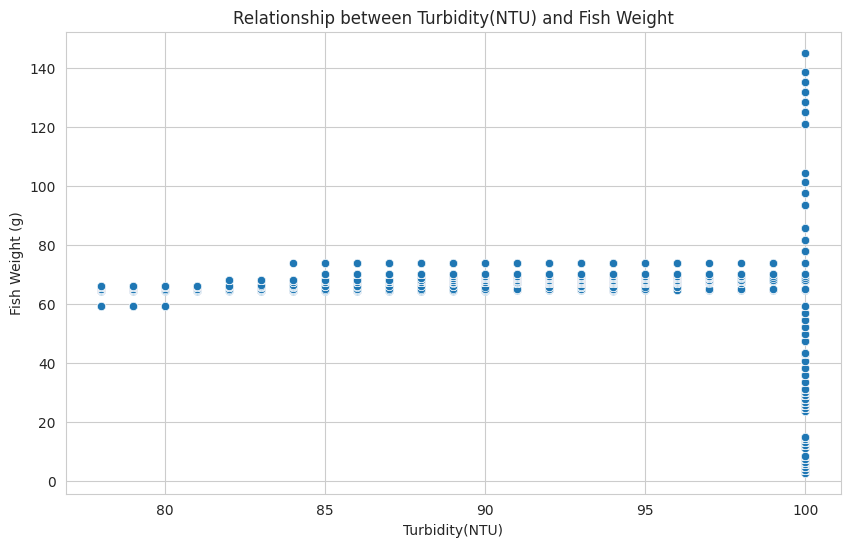

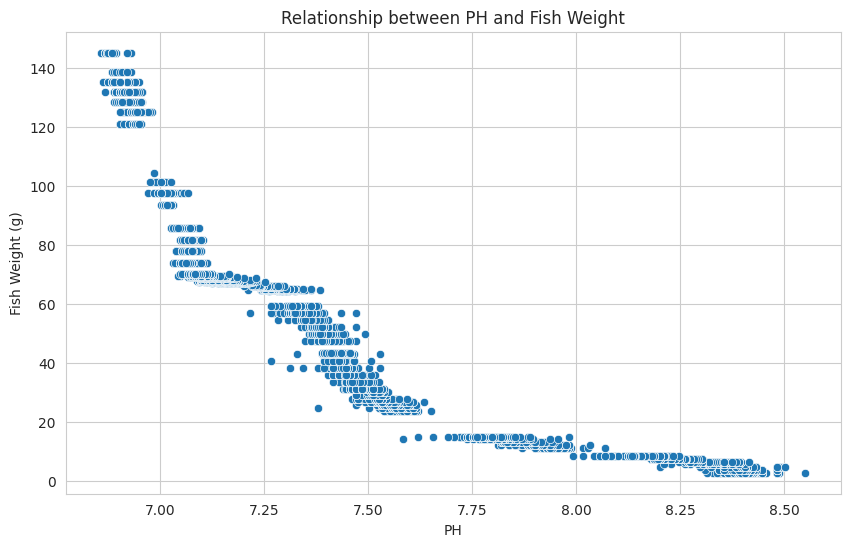

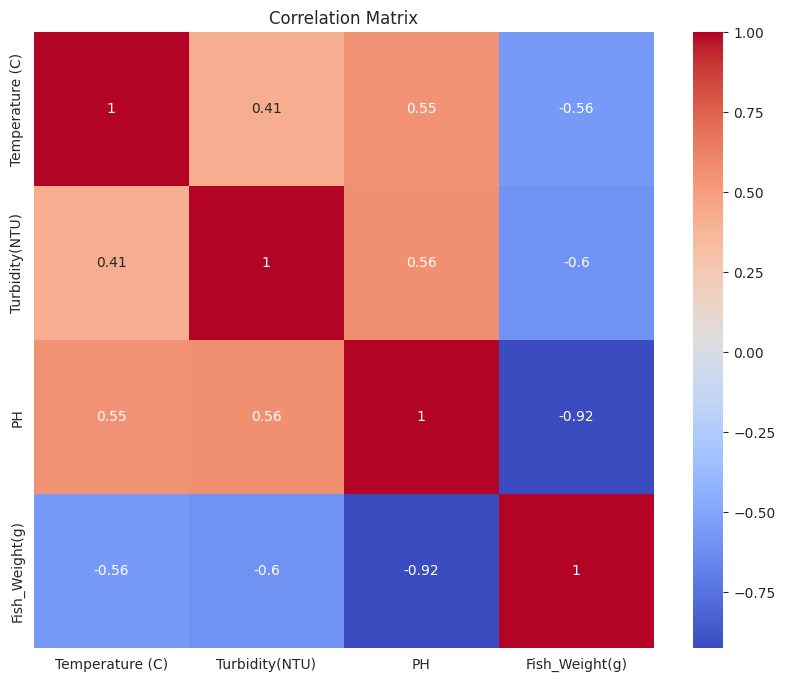

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram of Fish_Weight(g)
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Fish_Weight(g)'], kde=True)
plt.title('Distribution of Fish Weight')
plt.xlabel('Fish Weight (g)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for each variable against Fish_Weight(g)
for column in final_df.columns:
    if column != 'Fish_Weight(g)':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=final_df[column], y=final_df['Fish_Weight(g)'])
        plt.title(f'Relationship between {column} and Fish Weight')
        plt.xlabel(column)
        plt.ylabel('Fish Weight (g)')
        plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

features = ['Turbidity(NTU)', 'PH', 'Temperature (C)']
X = final_df[features]
y = final_df['Fish_Weight(g)']

In [ ]:
#  Scaling the Features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting Data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42 ,  shuffle=True)

In [ ]:
X_train.shape

(53917, 3)

In [ ]:
X_test.shape

(13480, 3)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()

In [ ]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

### Evaluating model using test data

In [ ]:

# Making predictions on the testing set
y_pred = model.predict(X_test)

### Calculating model perfromance

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 108.78120695256548
R-squared: 0.8672604806954685


## Improving Model Performance using Regularization

### Feture Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Split the new feature set into training and testing sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Train the model
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge - Mean Squared Error: {mse_ridge}')
print(f'Ridge - R-squared: {r2_ridge}')


Ridge - Mean Squared Error: 18.991782784709883
Ridge - R-squared: 0.9768254077317073


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_poly, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate using the best model
y_pred_best = best_model.predict(X_test_poly)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model - Mean Squared Error: {mse_best}')
print(f'Best Model - R-squared: {r2_best}')


Best Model - Mean Squared Error: 18.991941361952485
Best Model - R-squared: 0.9768252142289182


### Vizualing Predcition before optimization

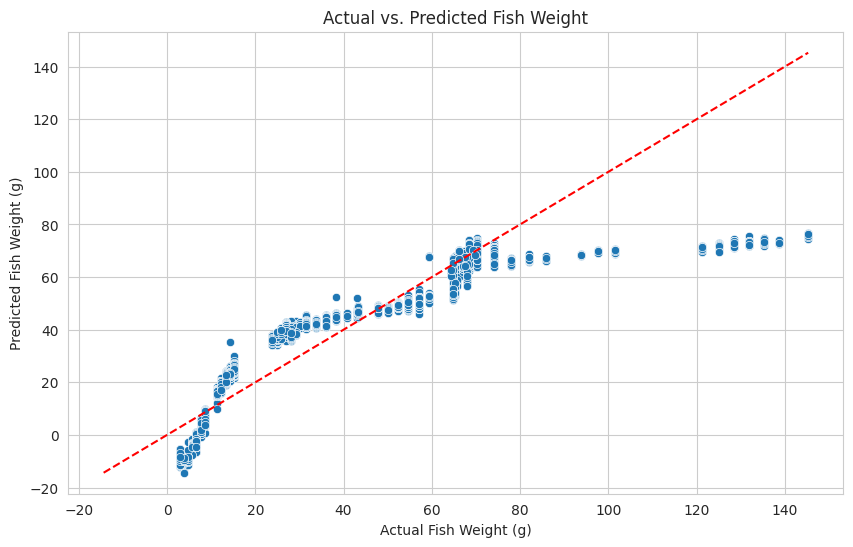

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual values and y_pred contains the predicted values from your model

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Fish Weight')
plt.xlabel('Actual Fish Weight (g)')
plt.ylabel('Predicted Fish Weight (g)')

# Plot a line representing perfect predictions
min_value = min(y_test.min(), y_pred.min())
max_value = max(y_test.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], 'r--')

plt.show()


### Vizualing Predcition after optimization

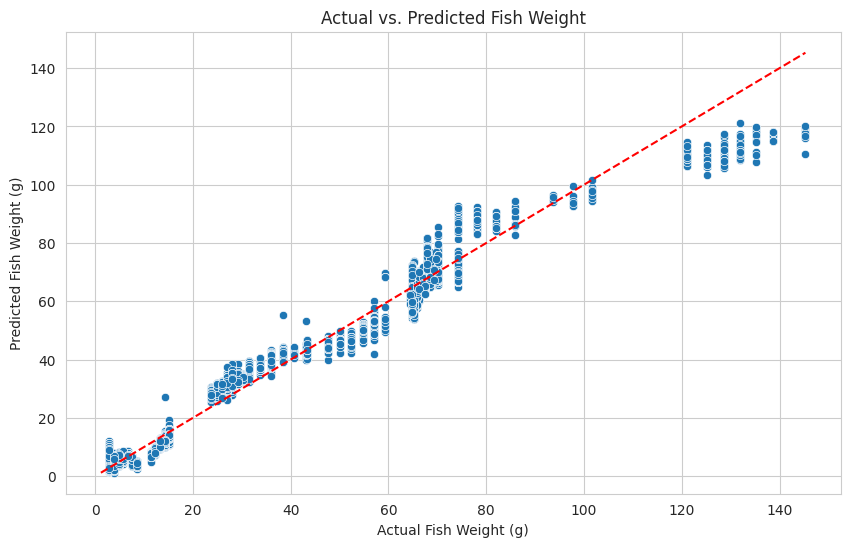

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test contains the actual values and y_pred contains the predicted values from your model

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.title('Actual vs. Predicted Fish Weight')
plt.xlabel('Actual Fish Weight (g)')
plt.ylabel('Predicted Fish Weight (g)')

# Plot a line representing perfect predictions
min_value = min(y_test.min(), y_pred_best.min())
max_value = max(y_test.max(), y_pred_best.max())
plt.plot([min_value, max_value], [min_value, max_value], 'r--')

plt.show()
